### Bibliothéques

In [38]:
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split

# Load and explore data 

In [41]:
data = pd.read_csv('large_ecommerce_transactions.csv')

In [42]:
#exploration prelémentaire
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
display(data.head(10))

,transaction_id,user_id,timestamp,amount,quantity,hour_of_day,day_of_week,month,time_since_last,ip_geodist,items_per_product,amount_per_item,user_segment,payment_method,country,is_anomaly,anomaly_type,rolling_mean_amount_5,rolling_std_amount_5,rolling_max_amount_5,rolling_mean_amount_10,rolling_std_amount_10,rolling_max_amount_10,rolling_mean_amount_30,rolling_std_amount_30,rolling_max_amount_30,amount_deviation_5,amount_deviation_10,amount_deviation_30
0,21045931-a280-4333-a61d-ae3e20b0c6b4,USER_04243,2024-08-20T21:49:54.594510,430.22,3,21,1,8,5861.79,0.0,1.0,143.41,medium_spender,debit_card,Germany,False,NaN,430.220,0.000000,430.22,430.220,0.000000,430.22,430.220,0.000000,430.22,0.000,0.000,0.000
1,e92e7977-cc78-4e28-a82a-5da06137cb1a,USER_07761,2024-08-20T22:07:20.594510,1380.61,3,22,1,8,13092.75,0.0,1.0,460.20,low_spender,paypal,USA,False,NaN,1380.610,0.000000,1380.61,1380.610,0.000000,1380.61,1380.610,0.000000,1380.61,0.000,0.000,0.000
2,2984b1b0-0457-49bf-8048-52f26228cd41,USER_07761,2024-08-20T22:09:23.896416,78.74,2,22,1,8,123.30,0.0,1.0,39.37,low_spender,paypal,USA,False,NaN,729.675,920.561105,1380.61,729.675,920.561105,1380.61,729.675,920.561105,1380.61,650.935,650.935,650.935
3,545778b6-d430-45d0-9b4a-b4599efdfc7f,USER_04243,2024-08-20T22:26:10.953191,825.46,4,22,1,8,2176.36,0.0,1.0,206.37,medium_spender,debit_card,Germany,False,NaN,627.840,279.476884,825.46,627.840,279.476884,825.46,627.840,279.476884,825.46,197.620,197.620,197.620
4,0f964d26-9a95-41e3-b5b8-345974323194,USER_09123,2024-08-20T23:06:16.594510,1026.41,1,23,1,8,7545.08,0.0,1.0,1026.41,low_spender,credit_card,USA,False,NaN,1026.410,0.000000,1026.41,1026.410,0.000000,1026.41,1026.410,0.000000,1026.41,0.000,0.000,0.000
5,8d76ccb2-00d6-419c-a61b-30508ce31565,USER_02995,2024-08-20T23:16:05.594510,650.29,2,23,1,8,3963.16,0.0,1.0,325.14,low_spender,google_pay,Canada,False,NaN,650.290,0.000000,650.29,650.290,0.000000,650.29,650.290,0.000000,650.29,0.000,0.000,0.000
6,91c8dadb-fcb7-420a-a4c9-c29c80d5f691,USER_05433,2024-08-20T23:59:57.594510,87.73,1,23,1,8,8829.52,0.0,1.0,87.73,low_spender,apple_pay,France,False,NaN,87.730,0.000000,87.73,87.730,0.000000,87.73,87.730,0.000000,87.73,0.000,0.000,0.000
7,eb05cad6-0afe-495e-9e9a-53d46e740f0e,USER_01353,2024-08-21T00:01:31.594510,341.42,3,0,2,8,15177.93,0.0,1.0,113.81,medium_spender,google_pay,Germany,False,NaN,341.420,0.000000,341.42,341.420,0.000000,341.42,341.420,0.000000,341.42,0.000,0.000,0.000
8,b123006f-017c-4736-92eb-f5da27b112d1,USER_01926,2024-08-21T00:04:34.594510,927.32,7,0,2,8,5831.59,0.0,1.0,132.47,vip,google_pay,Germany,False,NaN,927.320,0.000000,927.32,927.320,0.000000,927.32,927.320,0.000000,927.32,0.000,0.000,0.000
9,1abfe52c-c6b0-4e52-8df8-d5a84d0618e0,USER_04243,2024-08-21T00:08:43.432742,832.74,4,0,2,8,6152.48,0.0,1.0,208.19,medium_spender,debit_card,Germany,False,NaN,696.140,230.322240,832.74,696.140,230.322240,832.74,696.140,230.322240,832.74,136.600,136.600,136.600


In [43]:
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

In [44]:
print('information sur les données')
print(data.info())

information sur les données
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   transaction_id          1000000 non-null  object        
 1   user_id                 1000000 non-null  object        
 2   timestamp               999998 non-null   datetime64[ns]
 3   amount                  1000000 non-null  float64       
 4   quantity                1000000 non-null  int64         
 5   hour_of_day             1000000 non-null  int64         
 6   day_of_week             1000000 non-null  int64         
 7   month                   1000000 non-null  int64         
 8   time_since_last         1000000 non-null  float64       
 9   ip_geodist              1000000 non-null  float64       
 10  items_per_product       1000000 non-null  float64       
 11  amount_per_item         1000000 non-null  float64

On remarque que seulement la colonne << anomaly_type>> qui contient environ 98% des données monquantes.

In [46]:
data = data.drop(columns=['anomaly_type'])

In [47]:
# Vaut mieux supprimer les deux lignes où la variable timestamp est égale à NAT :
data = data.dropna(subset = ['timestamp'])

In [48]:
print(data.columns)
print(data.dtypes)
print(data.isnull().sum())

Index(['transaction_id', 'user_id', 'timestamp', 'amount', 'quantity',
       'hour_of_day', 'day_of_week', 'month', 'time_since_last', 'ip_geodist',
       'items_per_product', 'amount_per_item', 'user_segment',
       'payment_method', 'country', 'is_anomaly', 'rolling_mean_amount_5',
       'rolling_std_amount_5', 'rolling_max_amount_5',
       'rolling_mean_amount_10', 'rolling_std_amount_10',
       'rolling_max_amount_10', 'rolling_mean_amount_30',
       'rolling_std_amount_30', 'rolling_max_amount_30', 'amount_deviation_5',
       'amount_deviation_10', 'amount_deviation_30'],
      dtype='object')
transaction_id                    object
user_id                           object
timestamp                 datetime64[ns]
amount                           float64
quantity                           int64
hour_of_day                        int64
day_of_week                        int64
month                              int64
time_since_last                  float64
ip_geodist       

In [49]:
print(data["transaction_id"].nunique())
print(data["user_id"].nunique())
print(data["timestamp"].nunique())

999998
10000
999995


In [50]:
print(data[data['timestamp'].isnull()])

Empty DataFrame
Columns: [transaction_id, user_id, timestamp, amount, quantity, hour_of_day, day_of_week, month, time_since_last, ip_geodist, items_per_product, amount_per_item, user_segment, payment_method, country, is_anomaly, rolling_mean_amount_5, rolling_std_amount_5, rolling_max_amount_5, rolling_mean_amount_10, rolling_std_amount_10, rolling_max_amount_10, rolling_mean_amount_30, rolling_std_amount_30, rolling_max_amount_30, amount_deviation_5, amount_deviation_10, amount_deviation_30]
Index: []


<div style="width: 90%; margin: auto;">
  <h1 style="
      color: teal; 
      font-family: Georgia, serif; 
      text-align: center; 
      font-size: 48px; 
      font-weight: bold;
      ">
    Analyse des données numériques
  </h1>
</div>

In [52]:
print('description des données')
print(data.describe())

description des données
                           timestamp         amount       quantity  \
count                         999998  999998.000000  999998.000000   
mean   2024-11-23 02:44:36.093107200    1112.231089       3.380238   
min       2024-08-20 21:49:54.594510       3.790000       1.000000   
25%    2024-10-09 20:19:33.852352768     213.530000       2.000000   
50%    2024-11-23 04:27:22.157266688     529.935000       3.000000   
75%    2025-01-06 15:14:09.671366400    1255.290000       4.000000   
max       2025-03-20 09:27:36.129311  275616.810000     120.000000   
std                              NaN    3585.228316       3.173726   

         hour_of_day    day_of_week          month  time_since_last  \
count  999998.000000  999998.000000  999998.000000    999998.000000   
mean       11.511828       3.018229       7.844193      7166.924915   
min         0.000000       0.000000       1.000000         0.000000   
25%         6.000000       1.000000       2.000000      1291.

### Variable transaction amount:  

La majorité des transactions sont concentrées dans un tout petit intervalle de valeurs, les grandes montants sont extraiment rares, fait réference à une distribution fortement *asymetrique vers la droite*, ce qui reflete un comportement anormal à investiger.

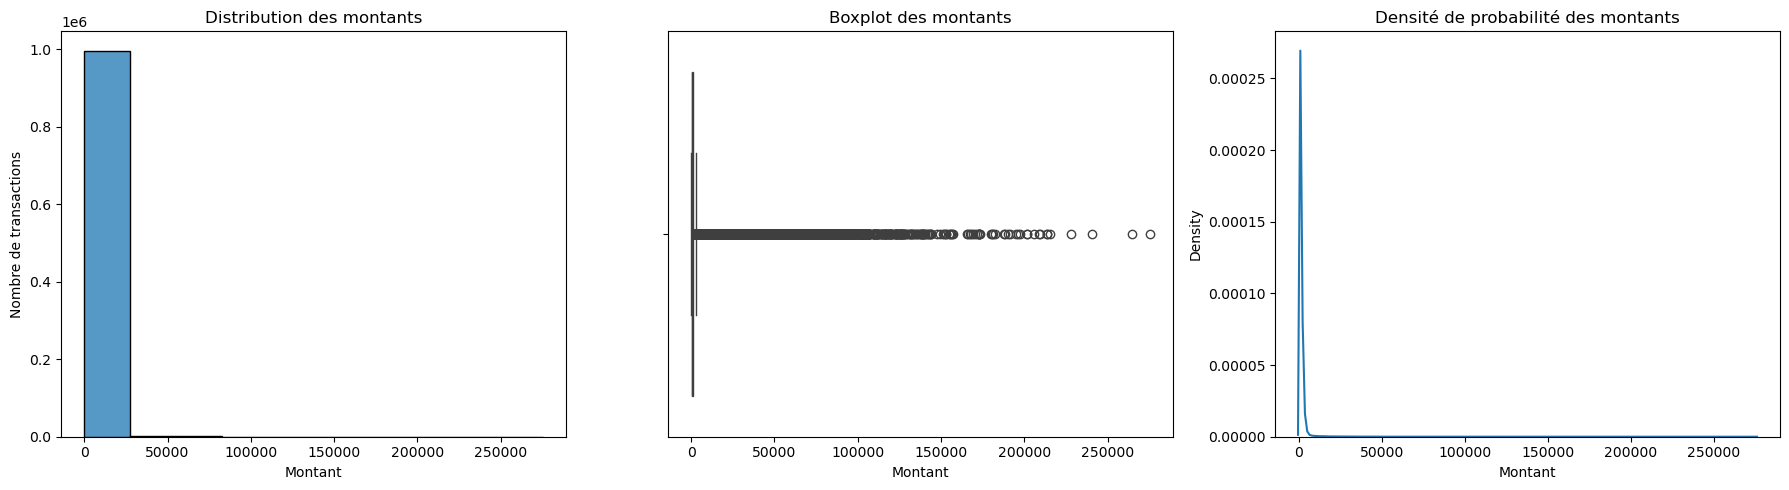

In [55]:
plt.figure(figsize=(18, 5))  # Une seule figure pour 3 graphiques

# Histogramme
plt.subplot(1, 3, 1)
sns.histplot(data['amount'], bins=10, kde=False)
plt.title('Distribution des montants')
plt.xlabel('Montant')
plt.ylabel('Nombre de transactions')

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=data['amount'])
plt.title('Boxplot des montants')
plt.xlabel('Montant')

# Densité
plt.subplot(1, 3, 3)
sns.kdeplot(data['amount'], bw_adjust=0.5)
plt.title('Densité de probabilité des montants')
plt.xlabel('Montant')

plt.tight_layout()  # Ajuste l'espacement
plt.show()

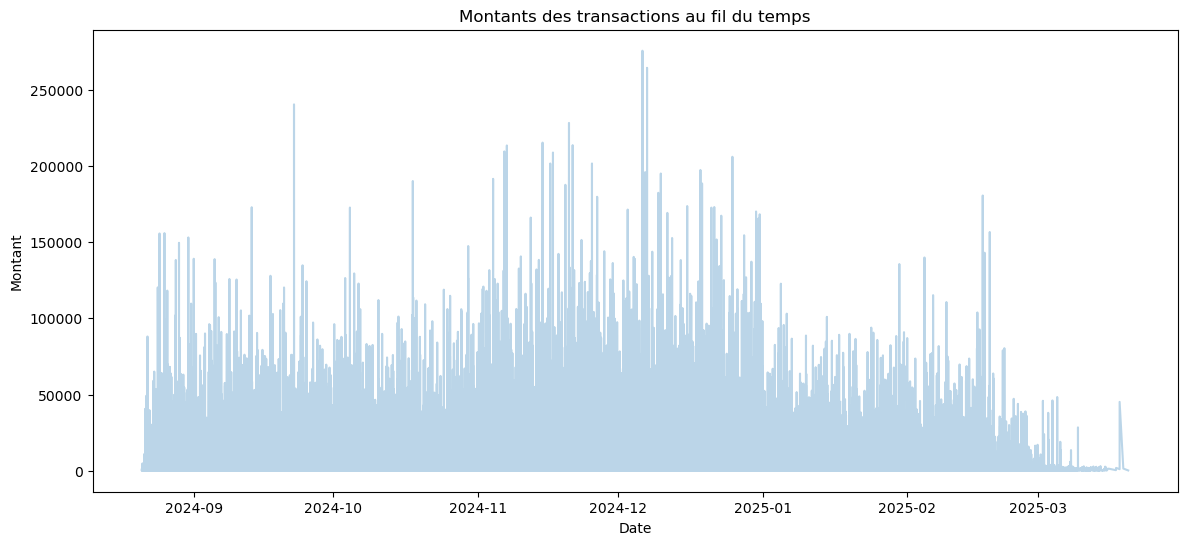

In [56]:
# transactions as time series 
data = data.sort_values('timestamp')
plt.figure(figsize=(14, 6))
plt.plot(data['timestamp'], data['amount'], alpha=0.3)
plt.title("Montants des transactions au fil du temps")
plt.xlabel("Date")
plt.ylabel("Montant")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16640\2529114413.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_users.values, y=top_users.index, palette="Blues_r")


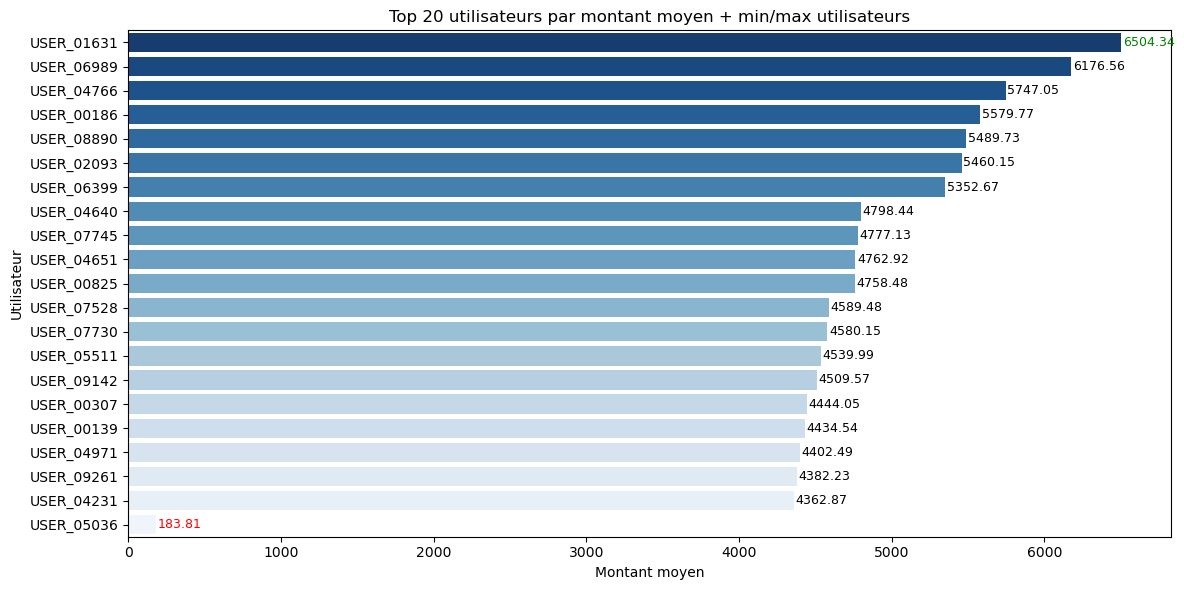

In [57]:
# Calcul des montants moyens par utilisateur
user_means_full = data.groupby('user_id')['amount'].mean()

# Extraire le max et le min (même s’ils ne sont pas dans le top 20)
max_user = user_means_full.idxmax()
min_user = user_means_full.idxmin()

# Extraire leurs valeurs
max_value = user_means_full[max_user]
min_value = user_means_full[min_user]

# Top 20 utilisateurs par montant moyen
top_users = user_means_full.sort_values(ascending=False).head(20)

# Ajouter le min et le max s’ils ne sont pas déjà inclus
if max_user not in top_users.index:
    top_users = pd.concat([top_users, pd.Series([max_value], index=[max_user])])

if min_user not in top_users.index:
    top_users = pd.concat([top_users, pd.Series([min_value], index=[min_user])])

# Re-trier le graphe pour l'affichage
top_users = top_users.sort_values(ascending=False)

# Tracer le graphe
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_users.values, y=top_users.index, palette="Blues_r")

plt.title("Top 20 utilisateurs par montant moyen + min/max utilisateurs")
plt.xlabel("Montant moyen")
plt.ylabel("Utilisateur")

# Ajouter les valeurs sur les barres
for i, value in enumerate(top_users.values):
    user = top_users.index[i]
    color = "black"
    if user == max_user:
        color = "green"
    elif user == min_user:
        color = "red"
    ax.text(value + 10, i, f"{value:.2f}", va='center', fontsize=9, color=color)

plt.tight_layout()
plt.show()

Ce graphe montre que l'utilisateur n'a que deux transactions avec des montants énormes et qui sortent de ses habitudes dans le comportement d'achats

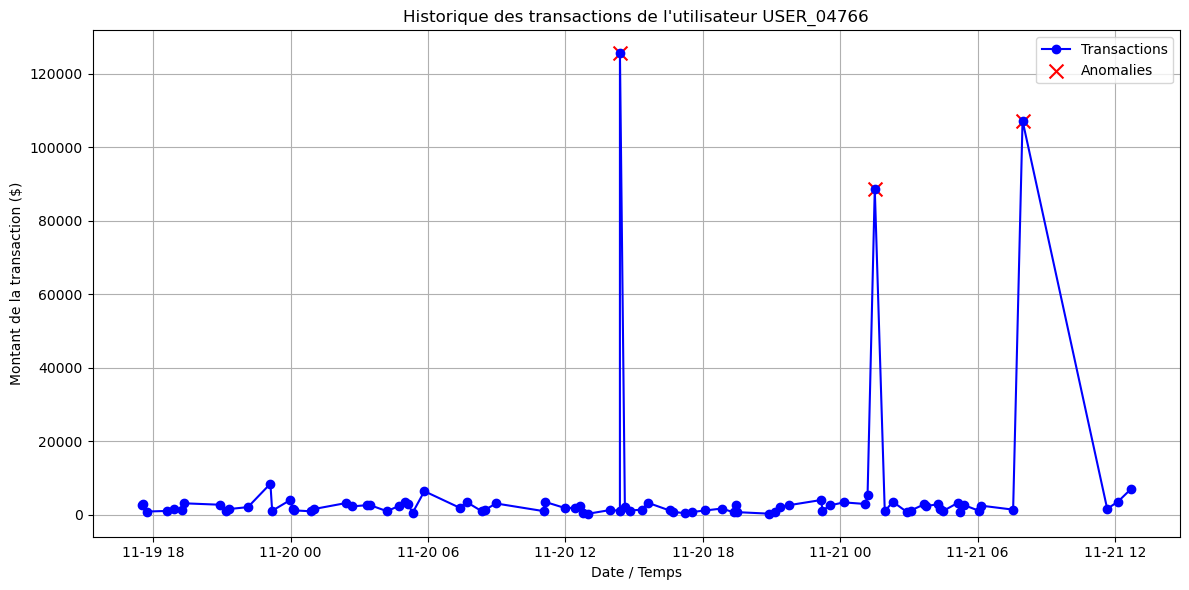

In [59]:
def plot_user_transactions(user_id, df):
    # Filtrer les transactions de l'utilisateur
    user_df = df[df['user_id'] == user_id]

    # Vérifier si des données existent pour cet utilisateur
    if user_df.empty:
        print(f"Aucune transaction trouvée pour l'utilisateur {user_id}.")
        return

    # Trier les données si nécessaire
    user_df = user_df.sort_values(by='timestamp')

    # Tracer le graphique principal
    plt.figure(figsize=(12, 6))
    plt.plot(user_df['timestamp'], user_df['amount'], marker='o', linestyle='-', color='blue', label='Transactions')

    # Ajouter les anomalies (si présentes)
    anomalies = user_df[user_df['is_anomaly'] == 1]
    if not anomalies.empty:
        plt.scatter(anomalies['timestamp'], anomalies['amount'], color='red', marker='x', s=100, label='Anomalies')

    plt.title(f"Historique des transactions de l'utilisateur {user_id}")
    plt.xlabel('Date / Temps')
    plt.ylabel('Montant de la transaction ($)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_user_transactions("USER_04766", data)

### Variable transaction quantité (quantity):  

Pas de valeurs null, c'est a dire que les données sont correctes, en moyennes les quantités d'articles achetaient par transaction est environ 3 produits.  
la majorité (75%) de transactions ne dépassent pas 4 achats alors que la valeur maximale est 120 (forte asymétries vers la droite).

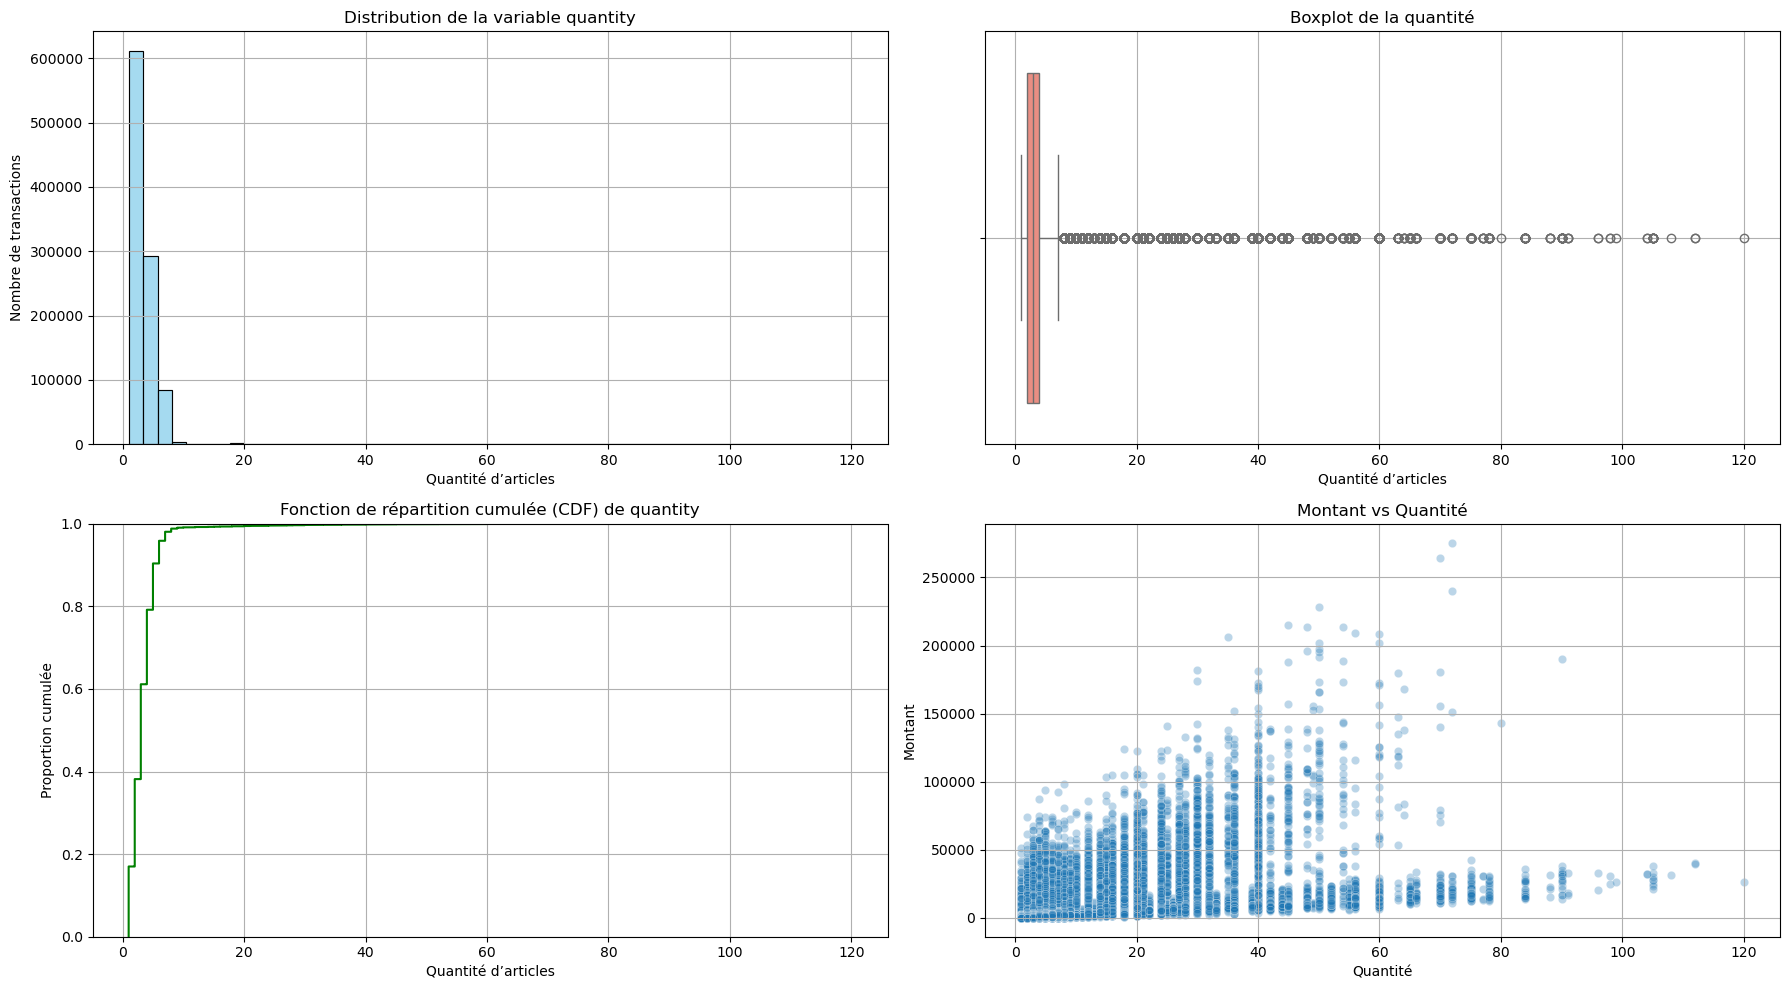

In [62]:
plt.figure(figsize=(18, 10))  # Augmenter la hauteur pour 4 graphes

# 1. Histogramme
plt.subplot(2, 2, 1)
sns.histplot(data['quantity'], bins=50, kde=False, color='skyblue')
plt.title('Distribution de la variable quantity')
plt.xlabel('Quantité d’articles')
plt.ylabel('Nombre de transactions')
plt.grid(True)

# 2. Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=data['quantity'], color='salmon')
plt.title('Boxplot de la quantité')
plt.xlabel('Quantité d’articles')
plt.grid(True)

# 3. CDF
plt.subplot(2, 2, 3)
sns.ecdfplot(data['quantity'], color='green')
plt.title('Fonction de répartition cumulée (CDF) de quantity')
plt.xlabel('Quantité d’articles')
plt.ylabel('Proportion cumulée')
plt.grid(True)

# 4. Scatterplot entre quantity et amount
plt.subplot(2, 2, 4)
sns.scatterplot(x='quantity', y='amount', data=data, alpha=0.3)
plt.title('Montant vs Quantité')
plt.xlabel('Quantité')
plt.ylabel('Montant')
plt.grid(True)

plt.tight_layout()
plt.show()


Interprétation :

Distribution asymétrique à droite (right-skewed) : la majorité des transactions comportent un petit nombre d’articles (1 à 5), mais certaines commandes sont extrêmement grandes (jusqu’à 120 articles).

Outliers : le boxplot montre la présence de valeurs aberrantes, probablement liées à des achats en gros ou à des comportements automatiques.

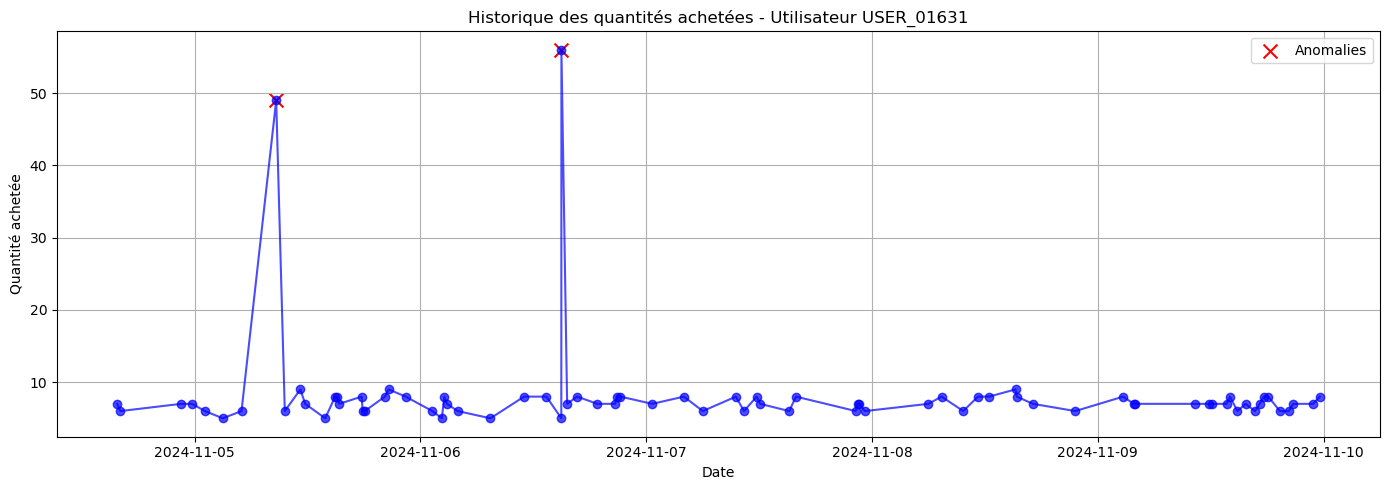

In [64]:
# Quantité d'achat par utilisateur selon son ID
def plot_user_quantity_history(data, user_id):
    """
    Affiche l'historique des quantités achetées par un utilisateur spécifique,
    avec des 'X' rouges pour les transactions anormales.
    
    Paramètres :
    - data : DataFrame contenant les transactions.
    - user_id : identifiant de l'utilisateur à analyser.
    """

    # Filtrer les données de l'utilisateur
    user_data = data[data['user_id'] == user_id]

    # Vérifier que des données existent
    if user_data.empty:
        print(f"Aucune transaction trouvée pour l'utilisateur {user_id}.")
        return

    # Trier les données par date ou timestamp
    if 'timestamp' in user_data.columns:
        user_data = user_data.sort_values(by='timestamp')
        x_label = 'timestamp'
    elif 'date' in user_data.columns:
        user_data = user_data.sort_values(by='date')
        x_label = 'date'
    else:
        print("Aucune colonne 'timestamp' ou 'date' trouvée pour l'axe temporel.")
        return

    # Tracer la courbe principale
    plt.figure(figsize=(14, 5))
    plt.plot(user_data[x_label], user_data['quantity'], marker='o', linestyle='-', color='blue', alpha=0.7)

    # Ajouter des 'X' rouges pour les anomalies
    anomalies = user_data[user_data['is_anomaly'] == 1]
    if not anomalies.empty:
        plt.scatter(anomalies[x_label], anomalies['quantity'], color='red', marker='x', s=100, label='Anomalies')

    plt.title(f"Historique des quantités achetées - Utilisateur {user_id}")
    plt.xlabel("Date")
    plt.ylabel("Quantité achetée")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_user_quantity_history(data, "USER_01631")

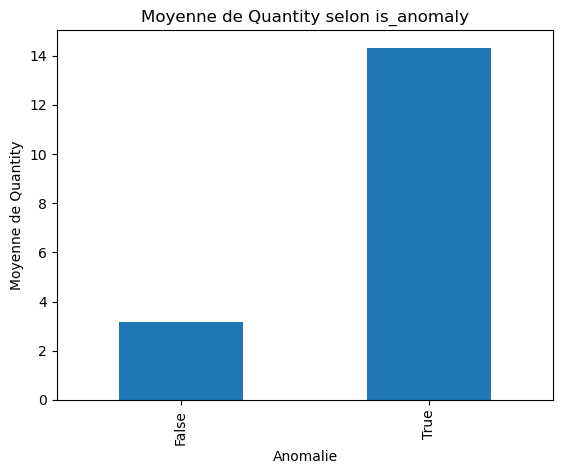

In [65]:
# La relation de quantité avec la variable anomalie
data.groupby('is_anomaly')['quantity'].mean().plot(kind='bar')
plt.title('Moyenne de Quantity selon is_anomaly')
plt.xlabel('Anomalie')
plt.ylabel('Moyenne de Quantity')
plt.show()

Les transactions diagnostiqué comme anomalie sont caractérisées par des quantités d'achats plus grande que ceux qui ne sont pas des anomalies.

#### Une remarque à vérifier : dans le même jours où cet utilisateur à depenser des montants très élevés sont les même où il a commandé des quantités grandes inhabituelles. Aissi il faut étudier l'intervalle entre transaction.

### Date_Time derivate features :

In [69]:
#le nombre des utilisateurs qui vient de commander pour la première fois:
print((data['time_since_last'] == 0).sum())

5


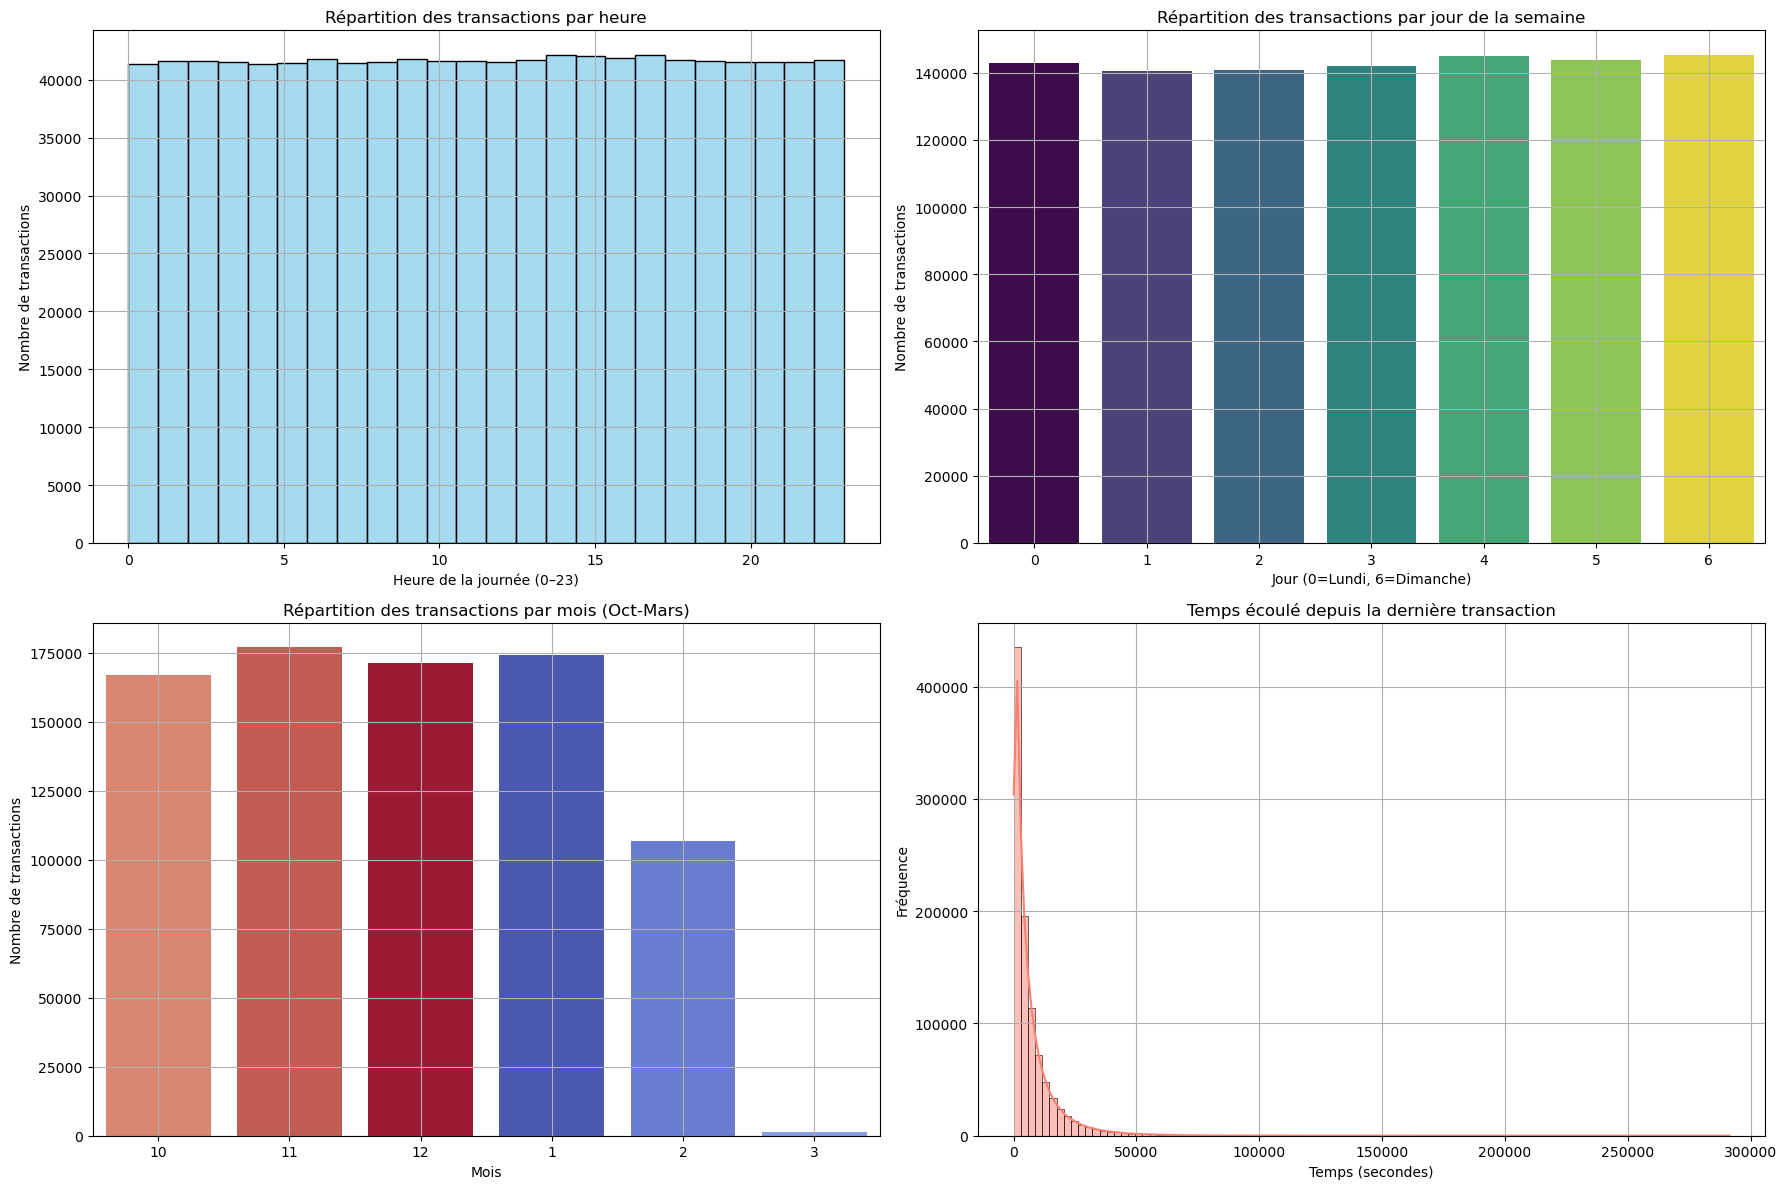

In [70]:
plt.figure(figsize=(18, 12))

# 1. Heure de la journée
plt.subplot(2, 2, 1)
sns.histplot(data['hour_of_day'], bins=24, kde=False, color='skyblue')
plt.title('Répartition des transactions par heure')
plt.xlabel('Heure de la journée (0–23)')
plt.ylabel('Nombre de transactions')
plt.grid(True)

# 2. Jour de la semaine
plt.subplot(2, 2, 2)
sns.countplot(x='day_of_week', data=data, hue='day_of_week', palette='viridis', legend=False)
plt.title('Répartition des transactions par jour de la semaine')
plt.xlabel('Jour (0=Lundi, 6=Dimanche)')
plt.ylabel('Nombre de transactions')
plt.grid(True)

# 3. Mois
plt.subplot(2, 2, 3)
mois_ordre = [10, 11, 12, 1, 2, 3]# Ordre personnalisé des mois
sns.countplot(x='month', data=data, hue='month', order=mois_ordre, palette='coolwarm', legend=False)
plt.title('Répartition des transactions par mois (Oct-Mars)')
plt.xlabel('Mois')
plt.ylabel('Nombre de transactions')
plt.grid(True)

# 4. Temps depuis la dernière transaction
plt.subplot(2, 2, 4)
sns.histplot(data['time_since_last'], bins=100, kde=True, color='salmon')
plt.title('Temps écoulé depuis la dernière transaction')
plt.xlabel('Temps (secondes)')
plt.ylabel('Fréquence')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Pour le graphe (hour_of_day) :
La répartition est très uniforme, ce qui suggère que les transactions se produisent à toute heure de la journée, sans pics majeurs.  
Cela peut indiquer une activité mondiale (avec des utilisateurs dans plusieurs fuseaux horaires) ou un trafic automatisé constant.  
NB : Chaque barre represente la somme des transactions effectuer dans cette heure et même chose pour les graphes qui suit.  
#### Pour le graphe (day_of_week) :
Les volumes sont assez similaires entre les jours, avec des légères hausses dans les jeudis et les dimanches.  
*Peut refléter des comportements d'achat réguliers ou des campagnes promotionnelles hebdomadaires à ces moments.
#### Pour le graphe (month) :  
Des pics importants pour les mois (11, 12, 1) >> Probalements liés aux périodes de soldes (black friday) ,fête de fin d'années, Noel...   
Des creux significatives pendants les deux dernièrs mois (2 et 3).  
#### Pour le graphe (time_since_last) :  
Forte concentration des temps très courts : cela indique que les transactions sont très fréquentes (activité fréquente ou automatisée).  
La courbe décroît rapidement : une grande majorité des transactions sont très rapprochées dans le temps (utilisateurs occasionnels ?).  


In [72]:
# Analyse pourquoi on a une chute brutale dans les transactions a partir du mois 2 
index_max = data['amount'].idxmax()
jour_pic = data.loc[index_max, 'timestamp']
anomalie_pic = data.loc[index_max, 'is_anomaly']
print(f"Jour du pic de montant : {jour_pic}")
print(f"Est-ce une anomalie ? : {anomalie_pic}")
# Faut analyser la concentrations des transactions anomaliques

# Nombre de jours enregistrés dans les mois 2 et 3:
filtre = data['timestamp'].dt.month.isin([2])
jours_uniques = data.loc[filtre, 'timestamp'].dt.date.unique()
nombre_jours = len(jours_uniques)
print(f"Nombre de jours dans les mois 2 : {nombre_jours}")

filtre = data['timestamp'].dt.month.isin([3])
jours_uniques = data.loc[filtre, 'timestamp'].dt.date.unique()
nombre_jours = len(jours_uniques)
print(f"Nombre de jours dans les mois 3 : {nombre_jours}")


Jour du pic de montant : 2024-12-06 05:54:17.462739
Est-ce une anomalie ? : True
Nombre de jours dans les mois 2 : 28
Nombre de jours dans les mois 3 : 20


Remarque :  
La baisse significative du volume de transactions observée au mois de mars peut être attribuée à plusieurs facteurs. Tout d’abord, il est important de noter que les données du mois de mars ne couvrent que 20 jours, ce qui explique partiellement la diminution. Toutefois, même en tenant compte de cette période incomplète, la baisse reste notable et ne semble pas uniquement due au nombre réduit de jours.

Cette chute pourrait être liée à :

*Une panne technique ou un bug ayant impacté la disponibilité ou la performance de la plateforme.

*Une anomalie dans les transactions ou dans l’expérience utilisateur, qui aurait pu générer une frustration chez les clients, les incitant à réduire leur activité ou à se tourner vers des services concurrents.

*Une intervention planifiée (maintenance, migration de système, etc.) ayant entraîné une interruption partielle ou une dégradation du service.

Ainsi, cette baisse mérite une investigation approfondie, notamment en croisant les journaux d’incidents techniques

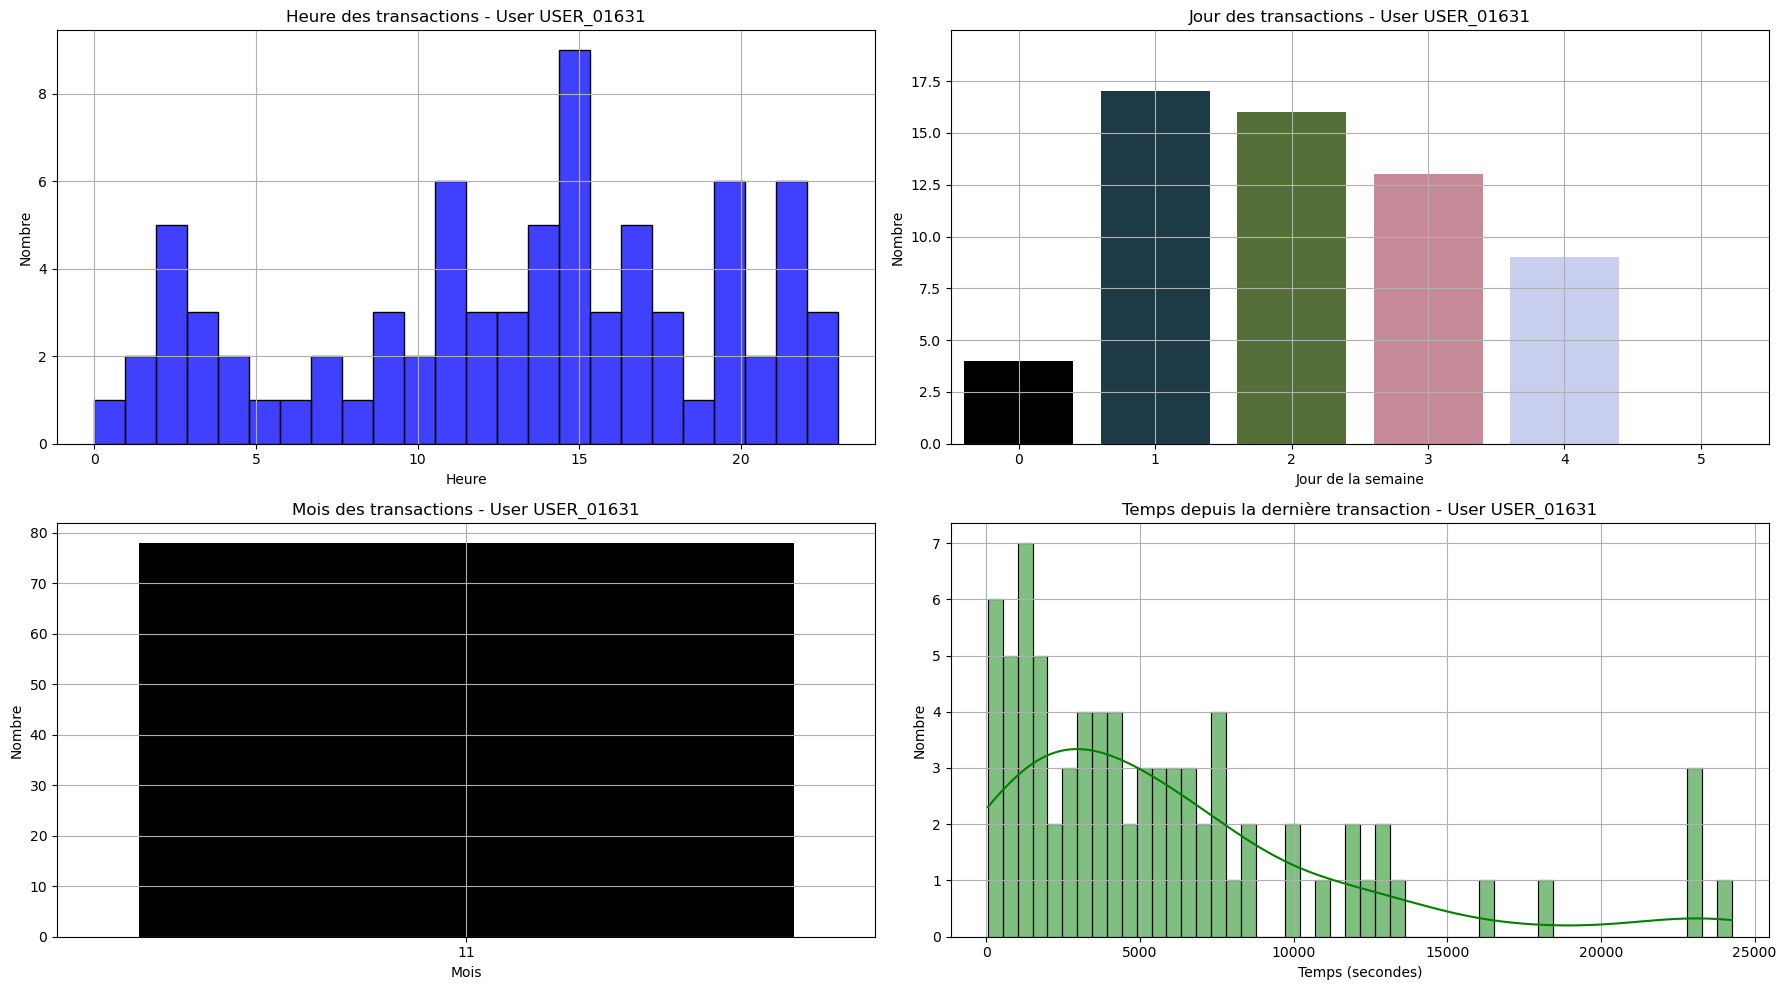

In [74]:
# Comportement temprelle selon un utilisateur particulièr: 
def plot_user_temporal_behavior(data, user_id):
    user_data = data[data['user_id'] == user_id]

    if user_data.empty:
        print(f"Aucune transaction trouvée pour l'utilisateur {user_id}")
        return

    plt.figure(figsize=(18, 10))

    # 1. Transactions par heure
    plt.subplot(2, 2, 1)
    sns.histplot(user_data['hour_of_day'], bins=24, color='blue')
    plt.title(f"Heure des transactions - User {user_id}")
    plt.xlabel('Heure')
    plt.ylabel('Nombre')
    plt.grid(True)

    # 2. Transactions par jour de la semaine
    plt.subplot(2, 2, 2)
    sns.countplot(x='day_of_week', data=user_data, hue='day_of_week', palette='cubehelix', legend=False)
    plt.title(f"Jour des transactions - User {user_id}")
    plt.xlabel('Jour de la semaine')
    plt.ylabel('Nombre')
    plt.grid(True)

    # 3. Transactions par mois
    plt.subplot(2, 2, 3)
    sns.countplot(x='month', data=user_data, hue='month', palette='magma', legend=False)
    plt.title(f"Mois des transactions - User {user_id}")
    plt.xlabel('Mois')
    plt.ylabel('Nombre')
    plt.grid(True)

    # 4. Temps entre transactions
    plt.subplot(2, 2, 4)
    sns.histplot(user_data['time_since_last'], bins=50, kde=True, color='green')
    plt.title(f'Temps depuis la dernière transaction - User {user_id}')
    plt.xlabel('Temps (secondes)')
    plt.ylabel('Nombre')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
plot_user_temporal_behavior(data, "USER_01631")

### La variable ip_geodist - distance géographique (estimée) entre l'adresse IP et l'adresse utilisateur:

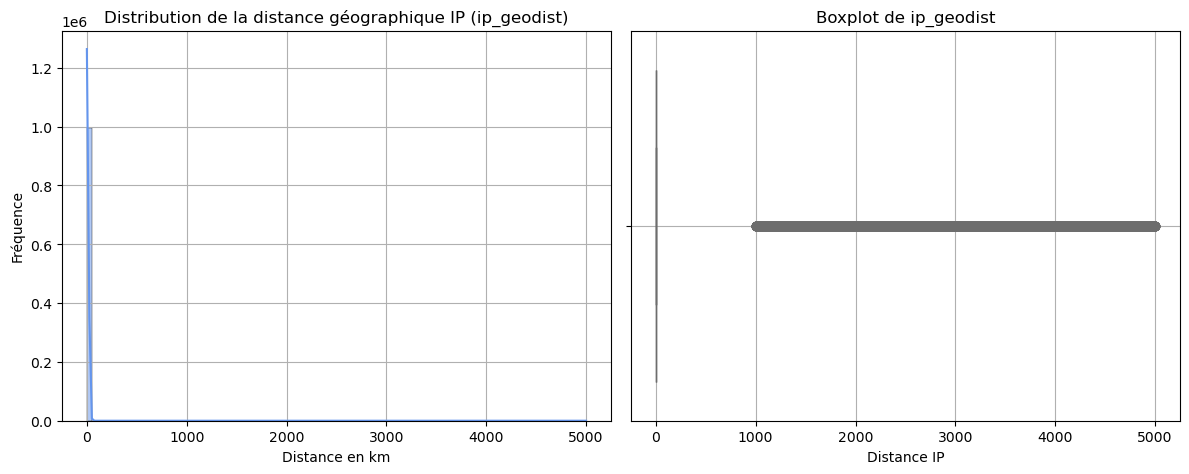

In [76]:
plt.figure(figsize=(12, 5))

# 1. Histogramme avec densité
plt.subplot(1, 2, 1)
sns.histplot(data['ip_geodist'], bins=100, kde=True, color='cornflowerblue')
plt.title('Distribution de la distance géographique IP (ip_geodist)')
plt.xlabel('Distance en km')
plt.ylabel('Fréquence')
plt.grid(True)

# 2. Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['ip_geodist'], color='salmon')
plt.title('Boxplot de ip_geodist')
plt.xlabel('Distance IP')
plt.grid(True)

plt.tight_layout()
plt.show()

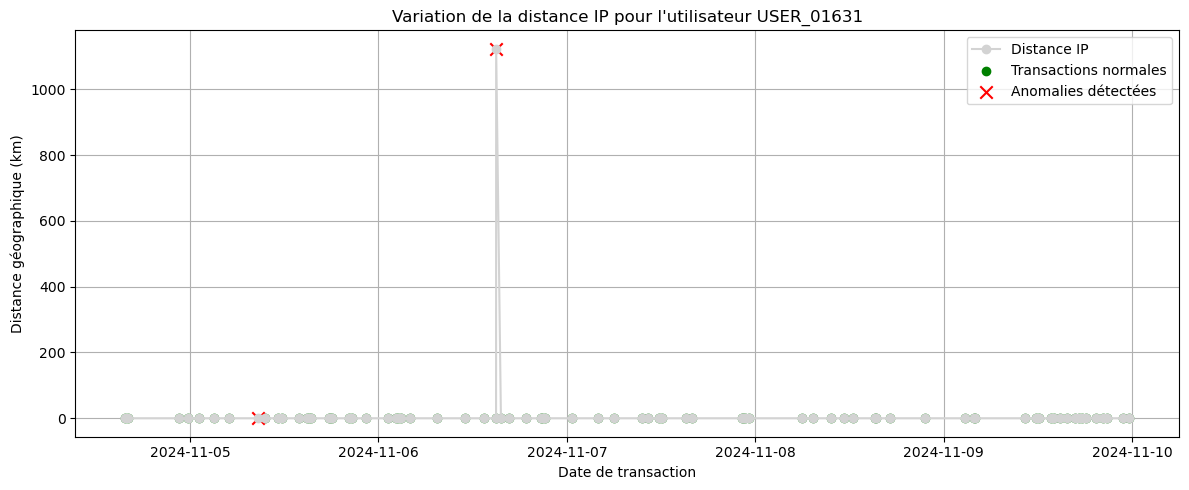

In [77]:
# analyse particulier a l'utilisateur : 
def plot_ip_geodist_with_anomalies(user_id):
    # Filtrer les données de l'utilisateur
    user_data = data[data['user_id'] == user_id].copy()
    user_data['timestamp'] = pd.to_datetime(user_data['timestamp'])
    user_data.sort_values('timestamp', inplace=True)

    # Séparer les transactions normales et anormales
    anomalies = user_data[user_data['is_anomaly'] == 1]
    normal = user_data[user_data['is_anomaly'] == 0]

    # Tracer
    plt.figure(figsize=(12, 5))
    plt.plot(user_data['timestamp'], user_data['ip_geodist'], label="Distance IP", color='lightgray', marker='o')
    plt.scatter(normal['timestamp'], normal['ip_geodist'], color='green', label="Transactions normales")
    plt.scatter(anomalies['timestamp'], anomalies['ip_geodist'], color='red', label="Anomalies détectées", marker='x', s=80)
    
    plt.title(f"Variation de la distance IP pour l'utilisateur {user_id}")
    plt.xlabel("Date de transaction")
    plt.ylabel("Distance géographique (km)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_ip_geodist_with_anomalies("USER_01631")

#### On remarque que pour cet utilisateur une transaction frauduleuse s'est effectuée avec une adresse IP distante de 1100 km.

En analysant la distribution de cette variable en lien avec les anomalies détectées, on observe que de nombreuses transactions anormales coïncident avec des pics de distance IP. Cela confirme que cette variable capte efficacement les ruptures dans le comportement géographique habituel, et peut donc être intégrée à un moteur de détection de fraude ou de scoring d’anomalie.

### Analyse de la variable (items_per_product) - Nombre d'articles identiques achetés dans une même transaction

In [81]:
display(data["items_per_product"].head(10))
print(data["items_per_product"].nunique())

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: items_per_product, dtype: float64

1


Un variable constante égale à 1, c'est à dire toujours un seul articl par produit, ce qui signifie que probablement la variable n'a pas était bien calculée, sinon les transactions sont alors enregistrées article par article (chaque produit est considéré comme unique,ei pas de commande grouper de même article.

In [83]:
# Supression de la variable items_per_product
data = data.drop(columns = ["items_per_product"])

### La variable (amount_per_item) - moyenne de montant payé pour chaque article

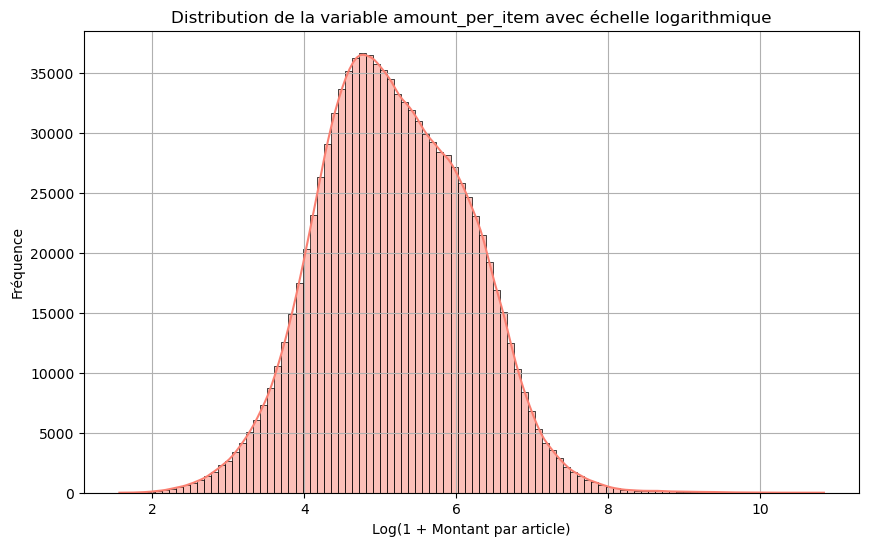

In [85]:
plt.figure(figsize=(10, 6))
# Histogramme avec échelle logarithmique
sns.histplot(np.log1p(data['amount_per_item']), bins=100, kde=True, color='salmon')

plt.title('Distribution de la variable amount_per_item avec échelle logarithmique')
plt.xlabel('Log(1 + Montant par article)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

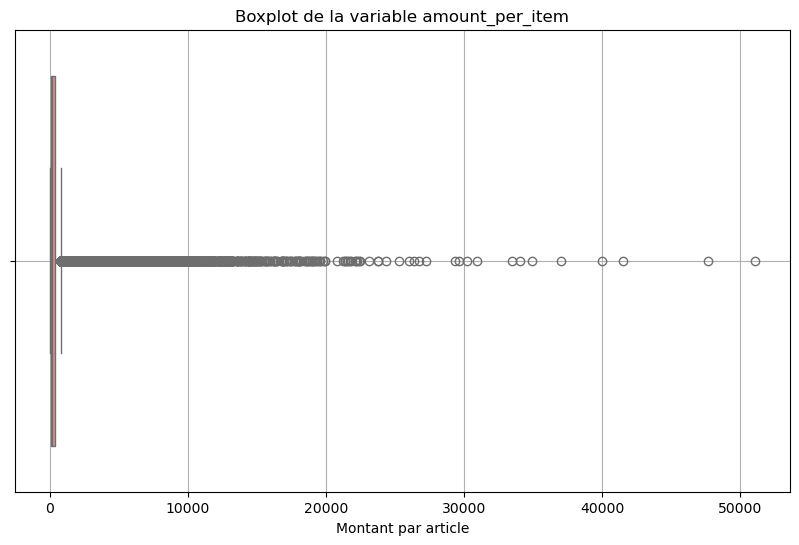

In [86]:
plt.figure(figsize=(10, 6))

# Boxplot de 'amount_per_item'
sns.boxplot(x=data['amount_per_item'], color='lightcoral')

plt.title('Boxplot de la variable amount_per_item')
plt.xlabel('Montant par article')
plt.grid(True)
plt.show()

### Relation entre amount_per_item et is_anomaly (pour observer si des anomalies sont liées à des montants anormaux)
Cela peut nous permettre de vérifier si des montants élevés ou inhabituels sont associés à des anomalies dans les transactions.

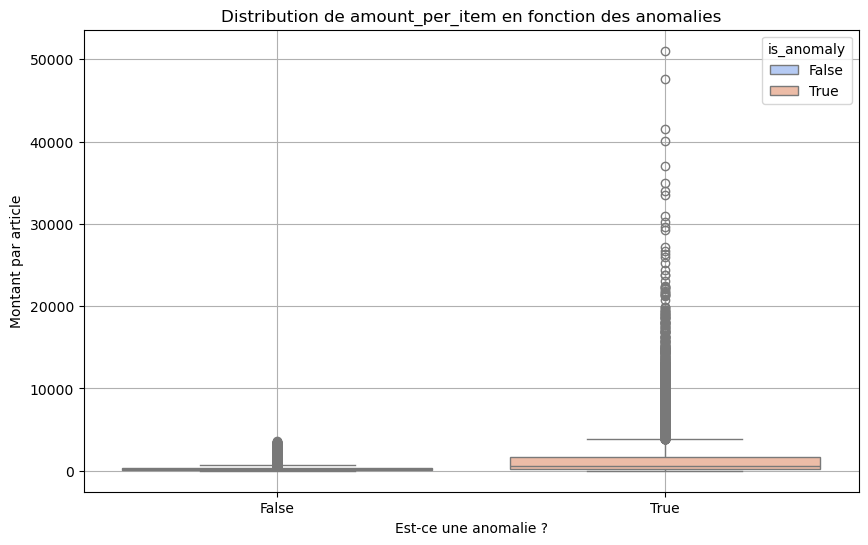

In [88]:
plt.figure(figsize=(10, 6))

# Boxplot de 'amount_per_item' en fonction de 'is_anomaly', avec la variable hue assignée
sns.boxplot(x='is_anomaly', y='amount_per_item', data=data, hue='is_anomaly', palette='coolwarm')

plt.title('Distribution de amount_per_item en fonction des anomalies')
plt.xlabel('Est-ce une anomalie ?')
plt.ylabel('Montant par article')
plt.grid(True)
plt.show()


 **Relation entre amount_per_item et les utilisateurs.**  
**Nous pouvons explorer comment les montants par article varient selon les utilisateurs pour détecter des comportements atypiques.**

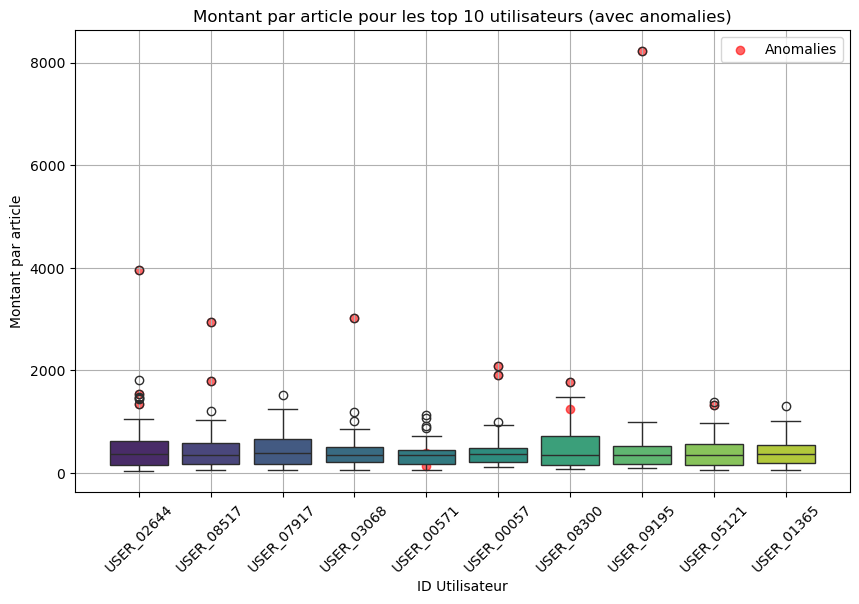

In [90]:
plt.figure(figsize=(10, 6))

# Sélection des top 10 utilisateurs avec la médiane de 'amount_per_item'
top_users = data.groupby('user_id')['amount_per_item'].median().sort_values(ascending=False).head(10).index

# Création du boxplot des montants par article pour les 10 meilleurs utilisateurs
sns.boxplot(x='user_id', y='amount_per_item', data=data[data['user_id'].isin(top_users)], hue='user_id', palette='viridis')

# Ajouter les points des anomalies (is_anomaly == 1)
anomalies = data[(data['user_id'].isin(top_users)) & (data['is_anomaly'] == 1)]
plt.scatter(anomalies['user_id'], anomalies['amount_per_item'], color='red', alpha=0.6, label='Anomalies')

# Titre et labels
plt.title('Montant par article pour les top 10 utilisateurs (avec anomalies)')
plt.xlabel('ID Utilisateur')
plt.ylabel('Montant par article')
plt.grid(True)

# Rotation des labels de l'axe X
plt.xticks(rotation=45)

# Affichage de la légende
plt.legend()

# Affichage du graphe
plt.show()

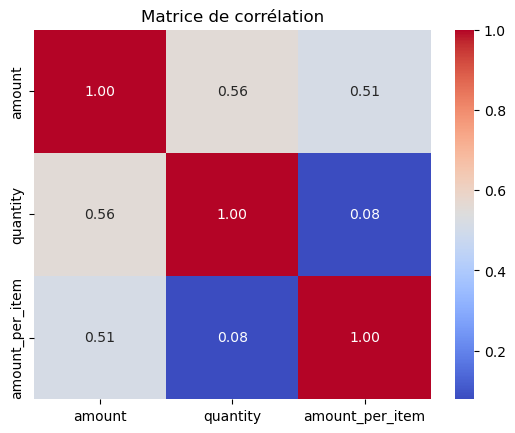

In [91]:
# Matrice de correlation : 
# On sélectionne les variables concernées
cols = ['amount', 'quantity', 'amount_per_item']
corr_matrix = data[cols].corr()

# Affichage
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [92]:
# Aucune redondance forte.
# VIF (Variance Inflation Factor)
X = data[['amount', 'quantity', 'amount_per_item']]
X = add_constant(X)

# Calcul du VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)
# Pas de problème de coliniarité le VIF samble être normale

          Variable       VIF
0            const  3.011418
1           amount  2.119569
2         quantity  1.576257
3  amount_per_item  1.474222


### L'analyse de la variable (user_segment)

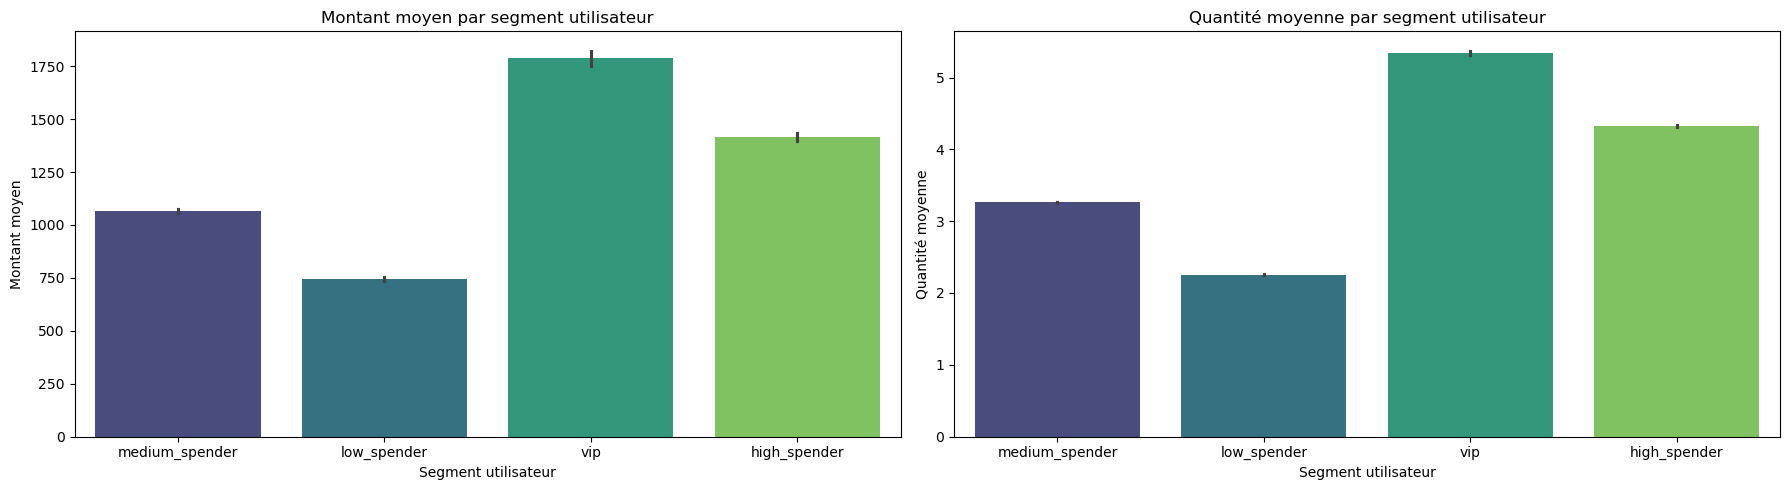

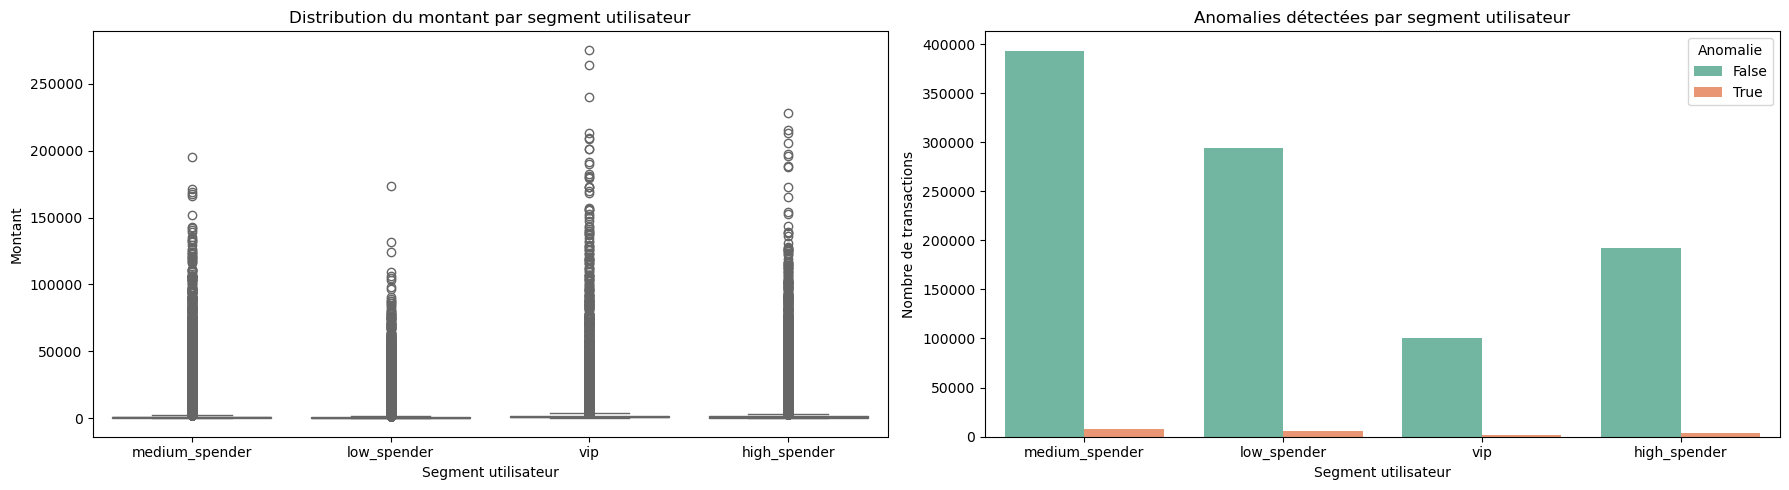

In [94]:
# --- 1. Moyenne par segment : amount et quantity ---
plt.figure(figsize=(18, 5))

# Montant moyen par segment
plt.subplot(1, 2, 1)
sns.barplot(x='user_segment', y='amount', data=data, estimator='mean', hue='user_segment', palette='viridis', legend=False)
plt.title('Montant moyen par segment utilisateur')
plt.ylabel('Montant moyen')
plt.xlabel('Segment utilisateur')

# Quantité moyenne par segment
plt.subplot(1, 2, 2)#Observer les médianes, les outliers, et la dispersion des valeurs par segment.
sns.barplot(x='user_segment', y='quantity', data=data, estimator='mean', hue='user_segment', palette='viridis', legend=False)
plt.title('Quantité moyenne par segment utilisateur')
plt.ylabel('Quantité moyenne')
plt.xlabel('Segment utilisateur')

plt.tight_layout()
plt.show()

# --- 2. Distribution & anomalies par segment ---
plt.figure(figsize=(18, 5))

# Distribution des montants
plt.subplot(1, 2, 1)
sns.boxplot(x='user_segment', y='amount', data=data, hue='user_segment', palette='coolwarm', legend=False)
plt.title('Distribution du montant par segment utilisateur')
plt.ylabel('Montant')
plt.xlabel('Segment utilisateur')

# Anomalies détectées par segment
plt.subplot(1, 2, 2)
sns.countplot(x='user_segment', hue='is_anomaly', data=data, palette='Set2')# observer la proportion d’anomalies par segment
plt.title('Anomalies détectées par segment utilisateur')
plt.ylabel('Nombre de transactions')
plt.xlabel('Segment utilisateur')
plt.legend(title='Anomalie')

plt.tight_layout()
plt.show()

In [95]:
# Taux d'anomalie par ségment
anomaly_rate_per_segment = data.groupby('user_segment')['is_anomaly'].mean().reset_index()
anomaly_rate_per_segment['is_anomaly'] = anomaly_rate_per_segment['is_anomaly'] * 100  # en pourcentage
anomaly_rate_per_segment.rename(columns={'is_anomaly': 'anomaly_rate (%)'}, inplace=True)
print(anomaly_rate_per_segment)

     user_segment  anomaly_rate (%)
0    high_spender          1.992791
1     low_spender          2.037500
2  medium_spender          1.958947
3             vip          1.969996


In [96]:
#Nombre d'anomalie par segment:
anomaly_count_per_segment = data[data['is_anomaly'] == True].groupby('user_segment').size().reset_index(name='anomaly_count')
print(anomaly_count_per_segment)

     user_segment  anomaly_count
0    high_spender           3909
1     low_spender           6118
2  medium_spender           7859
3             vip           2017


### visualiser la répartition des segments par pays:

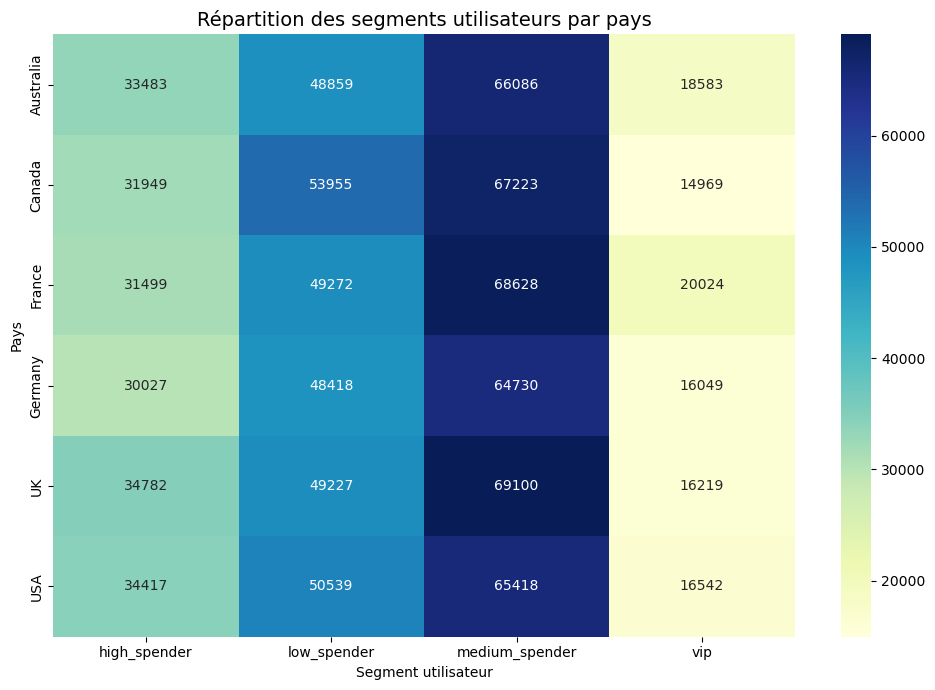

In [98]:
cross_tab = pd.crosstab(data['country'], data['user_segment'])

plt.figure(figsize=(10, 7))  
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

plt.title('Répartition des segments utilisateurs par pays', fontsize=14)
plt.xlabel('Segment utilisateur')
plt.ylabel('Pays')
plt.tight_layout()
plt.show()


### La variable country

Text(0.5, 1.0, 'Ordre des pays avec le plus de transactions')

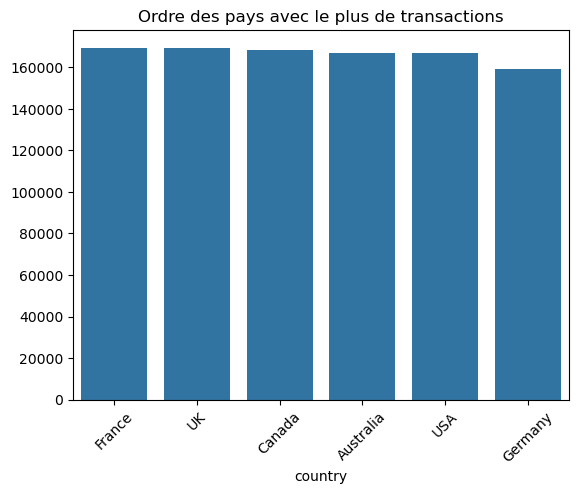

In [102]:
#  Identifier les pays avec le plus grand nombre de transactions
top_countries = data['country'].value_counts()
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.title("Ordre des pays avec le plus de transactions")

In [103]:
anomaly_rate_by_country = data.groupby('country')['is_anomaly'].mean().sort_values(ascending=False)
# 2. (Optionnel) Afficher les 10 pays avec le plus fort taux d'anomalie
print(anomaly_rate_by_country)

country
USA          0.020304
Canada       0.020114
Australia    0.019897
France       0.019755
UK           0.019713
Germany      0.019626
Name: is_anomaly, dtype: float64


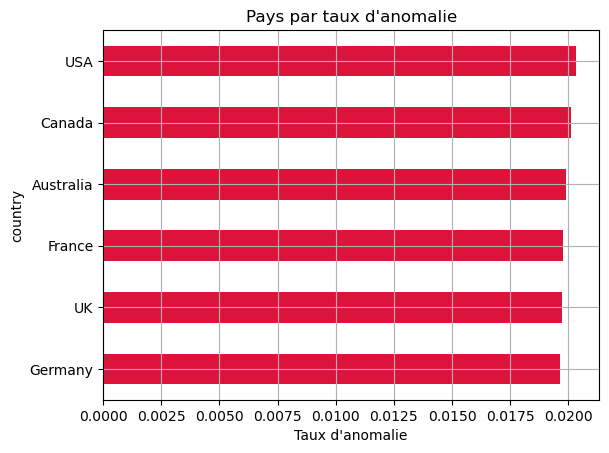

In [108]:
anomaly_rate_by_country.plot(kind='barh', color='crimson')
plt.xlabel("Taux d'anomalie")
plt.title("Pays par taux d'anomalie")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

Les transactions sont globalement réparties de manière uniforme entre les différents pays. De même, les anomalies sont presque équitablement distribuées, bien que les États-Unis figurent comme le pays le plus touché par les anomalies, même s’ils ne sont pas celui d’où provient le plus grand nombre de transactions.

  payment_method  transaction_count
0      apple_pay             209087
1     debit_card             201082
2    credit_card             199994
3     google_pay             196976
4         paypal             192859
  payment_method  anomaly_rate (%)
0      apple_pay          1.973820
1    credit_card          2.010560
2     debit_card          2.019574
3     google_pay          1.937292
4         paypal          2.010795


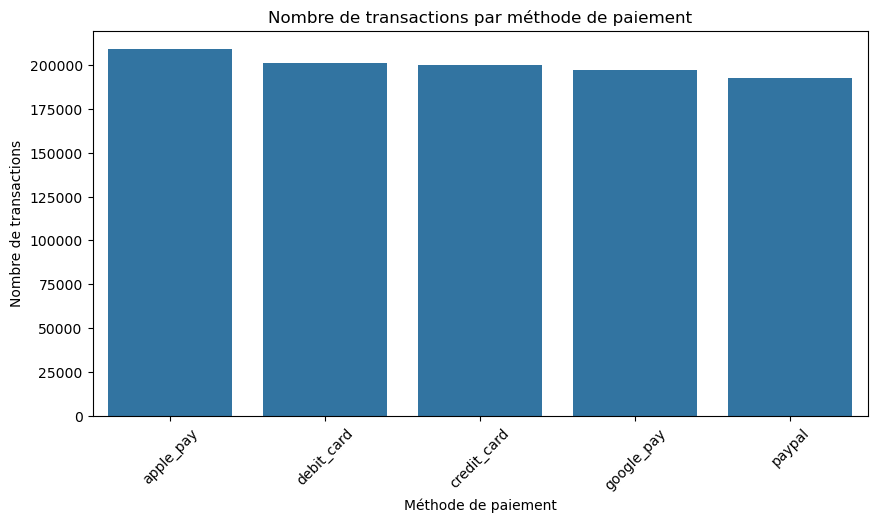

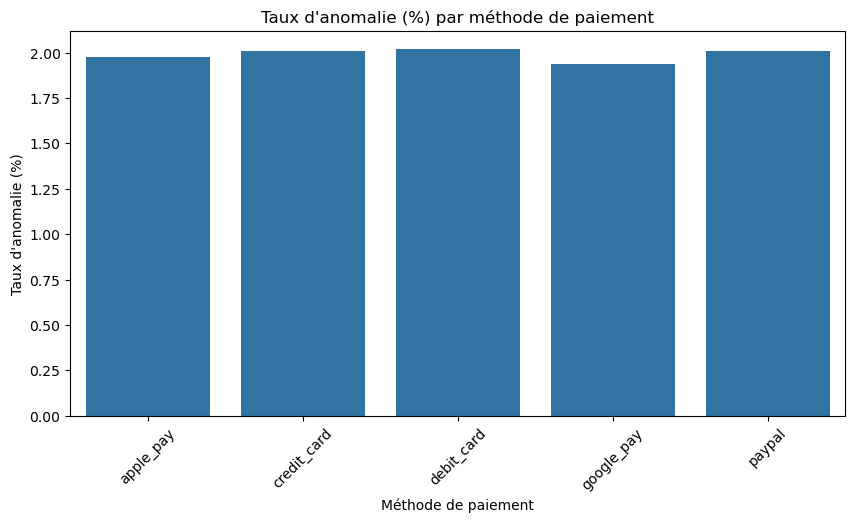

In [118]:
# 1. Répartition des transactions par méthode de paiement
payment_counts = data['payment_method'].value_counts().reset_index()
payment_counts.columns = ['payment_method', 'transaction_count']
print(payment_counts)

# 2. Calcul du taux d'anomalie par méthode de paiement
anomaly_rate_by_payment = data.groupby('payment_method')['is_anomaly'].mean().reset_index()
anomaly_rate_by_payment['anomaly_rate (%)'] = anomaly_rate_by_payment['is_anomaly'] * 100
anomaly_rate_by_payment.drop(columns=['is_anomaly'], inplace=True)
print(anomaly_rate_by_payment)

# 3. Visualisation du nombre de transactions par méthode
plt.figure(figsize=(10,5))
sns.barplot(x='payment_method', y='transaction_count', data=payment_counts)
plt.title("Nombre de transactions par méthode de paiement")
plt.xlabel("Méthode de paiement")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45)
plt.show()

# 4. Visualisation du taux d'anomalie par méthode
plt.figure(figsize=(10,5))
sns.barplot(x='payment_method', y='anomaly_rate (%)', data=anomaly_rate_by_payment)
plt.title("Taux d'anomalie (%) par méthode de paiement")
plt.xlabel("Méthode de paiement")
plt.ylabel("Taux d'anomalie (%)")
plt.xticks(rotation=45)
plt.show()

## Split des jeux de données

In [120]:
X_train, X_temp = train_test_split(data, test_size=0.4, random_state=42)

In [122]:
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

In [128]:
X_train.to_csv("train.csv", index=False)
X_val.to_csv("validation.csv", index=False)
X_test.to_csv("test.csv", index=False)

PermissionError: [Errno 13] Permission denied

In [ ]:
X_test.to_csv(r"C:\Users\HP\Documents\test.csv", index=False)